<br>

<font size=6 color='green'>**Machine learning model serialization with the pickle library**</font>

---
---

In [2]:
# visualizando a versão da linguagem python utilizado nesse notebook
from platform import python_version
print('[VERSIOn] Python:', python_version())

[VERSIOn] Python: 3.10.12


In [3]:
# instalando e atualizando as bibliotecas auxiliares
!pip install --q watermark -U
!pip install --q xgboost -U

In [4]:
# importando as bibliotecas
import pandas as pd
import pickle
import sklearn
import xgboost

In [5]:
# gravando as versões das bibliotecas utilizadas nesse notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | Machine Learning model deployment with Pickle' --iversions

Author: Fernando Galvão | Machine Learning model deployment with Pickle

sklearn: 1.2.2
pandas : 1.5.3
xgboost: 2.0.3



In [6]:
# importando os módulos/funções necessárias
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier

In [7]:
# visualizando as informações gerais do conjunto de dados
info = load_breast_cancer()
print(info.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# instanciando as variáveis de independente (X | entrada) e a variável dependente (y | saída)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [9]:
# visualizando as 5 primeiras observações das variáveis de entrada
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# visualizando as 5 primeiras observações das variável de saída
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [11]:
# particionando as variáveis (entrada e sáida) em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # variáveis: entrada (X) e saída (y)
    test_size=0.3,      # 30% reservado para o teste e o restante, ou seja, 70% para o treino do modelo
    random_state=1234,  # definindo a reprodutibilidade do experimento
    stratify=y          # estratificando a variável alvo
)

In [18]:
# visualizando as 5 primeiras observações do conjunto de dados de treino e as suas respectivas saídas
display(X_train[:5])
print()
y_train[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.014040,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.13030,0.1696,0.1927,0.07485,0.2965,0.07662
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.077850,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.2702,0.17650,0.2609,0.06735
500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.061420,0.1668,0.06869,...,16.76,20.43,109.70,856.9,0.11350,0.2176,0.1856,0.10180,0.2177,0.08549
231,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,12.08,33.75,79.82,452.3,0.09203,0.1432,0.1089,0.02083,0.2849,0.07087
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.039650,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.14020,0.2360,0.1898,0.09744,0.2608,0.09702


427    1
365    0
500    1
231    1
320    1
Name: target, dtype: int64

In [13]:
#  instanciando o modelo
model = XGBClassifier(
    n_estimators=100,   # número de estimadores
    random_state=1234   # definindo a reprodutibilidade do experimento
)

# visualizando a arquitetura do modelo
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [14]:
# visualizando o tipo dos objetos instanciados
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [15]:
# contabilizando a quantidade de observações nos objetos
len(X_train), len(y_train)

(398, 398)

In [ ]:
# y_train = y_train.astype(int)

In [20]:
# visualizando as 15 primeiras das saídas do conjunto de treino
y_train[:15]

427    1
365    0
500    1
231    1
320    1
326    1
456    1
107    1
241    1
108    0
163    1
345    1
541    1
177    0
385    0
Name: target, dtype: int64

In [21]:
# realizando o treinamento do modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [22]:
# criando uma pasta para salvar o modelo treinado
!mkdir model

In [23]:
# visualizando o diretório principal de trabalho
%pwd

'/content'

In [24]:
# visualizando o(s) conteúdo(s) presente no diretório de trabalho
%ls

model/  sample_data/


In [25]:
# realizando a serialização do modelo e, salvando na pasta "model"
pickle.dump(obj=model, file=open(file='model/model.pkl', mode='wb'))

In [26]:
# visualizando o conteúdo da pasta "model"
%ls model/

model.pkl


In [27]:
# instanciando o modelo serializado no objeto "pickled_model"
pickled_model = pickle.load(file=open(file='model/model.pkl', mode='rb'))

In [28]:
# visualizando o tipo do objeto
type(pickled_model)

xgboost.sklearn.XGBClassifier

In [29]:
# com o modelo instanciado iremos realizar a predição com os dados de teste (X_test)
y_pred_pickle = pickled_model.predict(X=X_test)

In [30]:
# visualizando as 5 primeiras predições realizadas
y_pred_pickle[:5]

array([1, 1, 1, 0, 1])

In [31]:
# imprimindo relatório final
print(classification_report(y_true=y_test, y_pred=y_pred_pickle))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [32]:
# calculando a matriz de confusão
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_pickle)
cm

array([[ 60,   4],
       [  0, 107]])

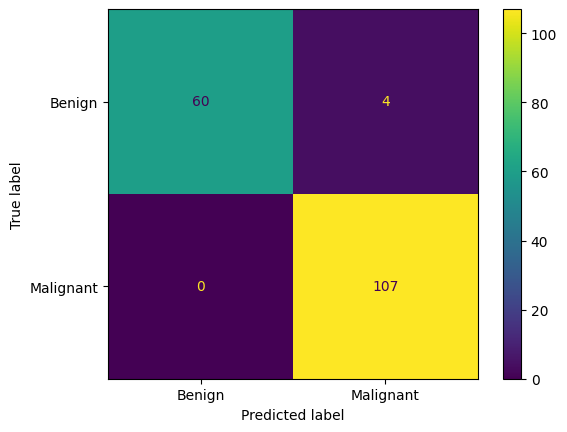

In [33]:
# plotando o gráfico da matriz de confusão
fig = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Benign', 'Malignant']
)

fig.plot();

In [34]:
# instanciando os dados "X_test" em um "dara frame"
df = pd.DataFrame(data=X_test)

# concatenando os dados de saída (y_test)
df['class'] = y_test

# visualizando as 5 primeiras linhas do "data frame"
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,...,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712,1
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.019240,0.1649,0.07633,...,19.62,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170,1
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.023070,0.1846,0.05325,...,26.56,127.30,1084.0,0.1009,0.2920,0.24770,0.08737,0.4677,0.07623,0
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.096670,0.1741,0.05176,...,17.81,146.60,1495.0,0.1124,0.2016,0.22640,0.17770,0.2443,0.06251,0
128,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.085340,0.2001,0.06467,...,18.33,105.90,762.6,0.1386,0.2883,0.19600,0.14230,0.2590,0.07779,1


In [35]:
# inserindo no "data frame" os dados preditos pelo modelo para cada observação presente
df['prediction'] = y_pred_pickle

In [36]:
# visualizando as 15 primeiras observações do conjunto de dados somente das colunas "class" e "prediction"
df[['class', 'prediction']].head(n=15)

,class,prediction
61,1,1
114,1,1
489,0,1
161,0,0
128,1,1
192,1,1
13,0,0
92,1,1
221,1,1
109,1,1


In [37]:
# visualizando as 15 últimas observações do conjunto de dados somente das colunas "class" e "prediction"
df[['class', 'prediction']].tail(n=15)

,class,prediction
476,1,1
38,0,1
97,1,1
333,1,1
167,0,0
200,1,1
327,1,1
339,0,0
428,1,1
125,1,1


In [38]:
# visualizando as variáveis de ambiente
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
ConfusionMatrixDisplay   type                      <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
X                        DataFrame                      mean radius  mean te<...>\n[569 rows x 30 columns]
XGBClassifier            type                      <class 'xgboost.sklearn.XGBClassifier'>
X_test                   DataFrame                      mean radius  mean te<...>\n[171 rows x 32 columns]
X_train                  DataFrame                      mean radius  mean te<...>\n[398 rows x 30 columns]
classification_report    function                  <function classification_<...>report at 0x7f2927af3010>
cm                       ndarray                   2x2: 4 elems, type `int64`, 32 bytes
confusion_matrix         function                  <function confusion_matrix at 0x7f2927af25f0>
df                       DataFrame                      mean radius